# Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df=pd.read_csv("C:\\Users\HP\Desktop\medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


it is observed that the provided dataset have 1338 rows and 7 columns.

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
699,23,female,39.270,2,no,southeast,3500.61230
1198,40,male,29.355,1,no,northwest,6393.60345
543,54,female,47.410,0,yes,southeast,63770.42801
330,61,female,36.385,1,yes,northeast,48517.56315
1026,19,male,26.030,1,yes,northwest,16450.89470
1237,58,female,28.215,0,no,northwest,12224.35085
240,23,female,36.670,2,yes,northeast,38511.62830
1249,32,male,33.630,1,yes,northeast,37607.52770
1068,63,male,21.660,1,no,northwest,14349.85440
746,34,male,27.000,2,no,southwest,11737.84884


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


observation concludes there are 2 Columns containing float values, 3 contains categorical values and rest 2 columns contains int values.

# Exploratry Data Analysis (EDA)

In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [10]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values presnt in this dataset

In [12]:
df.loc[df["charges"]==" "].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
for i in df.columns:
    print(df.loc[df["charges"]==" "].count())
    print(' ')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 


There is no blank values present in dataset.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
# Separating Categorical Columns
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical columns:", categorical_columns)

# Separating Numerical Columns
numerical_columns = [col for col in df.columns if df[col].dtype != "object"]
print("Numerical columns:", numerical_columns)

Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


In [18]:
print(categorical_columns)
print(numerical_columns)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


In [19]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# Description of Dataset

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present

From the above description we can observe the following:

A) The counts of all the columns are same which means there are no missing values in the dataset.

B) The Mean is greater than meadian(50%) it mean the data is left skewed.

C) and the max values is higher than 75% in age bmi children and there is huge difference in charges

# Visualizing catogerical data

<function matplotlib.pyplot.show(close=None, block=None)>

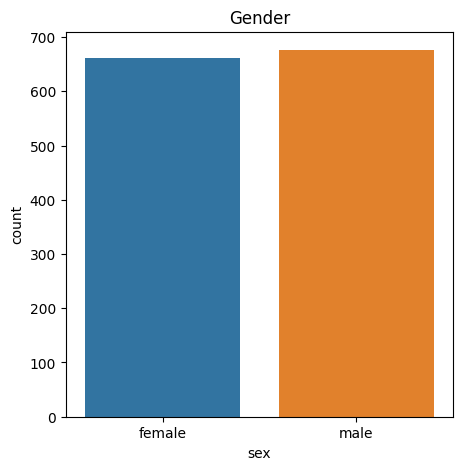

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x="sex", data=df)
plt.title("Gender")
plt.show

As the above data shows, almost male and female both are equal in data

<function matplotlib.pyplot.show(close=None, block=None)>

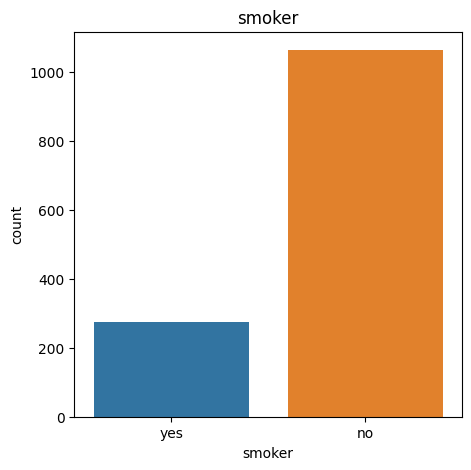

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoker", data=df)
plt.title("smoker")
plt.show

In [23]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

There are less number of smokers

<function matplotlib.pyplot.show(close=None, block=None)>

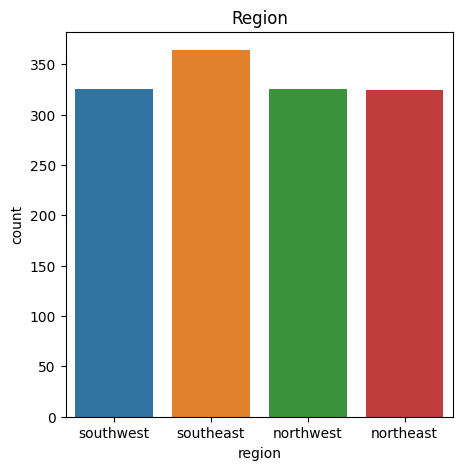

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x="region", data=df)
plt.title("Region")
plt.show

there are higher number of people in southeast then others regions and rest of the reason are almost equal numbers of people

<function matplotlib.pyplot.show(close=None, block=None)>

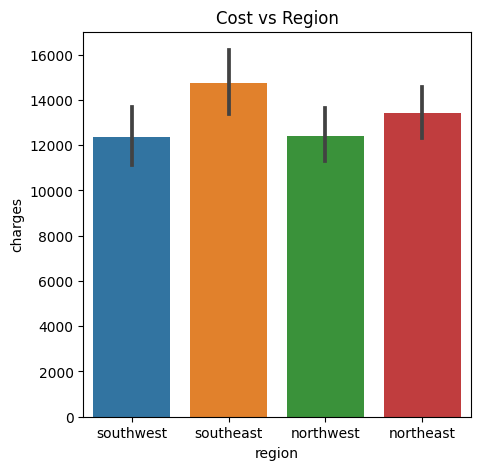

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x="region",y="charges", data=df)
plt.title("Cost vs Region")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

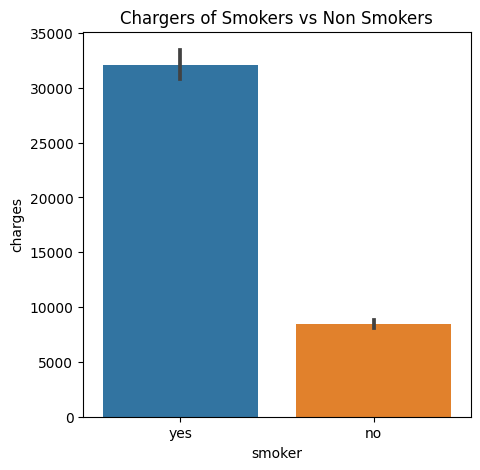

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x="smoker",y="charges", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

In [28]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

There are much higher charges of smokers than the non smokers

<function matplotlib.pyplot.show(close=None, block=None)>

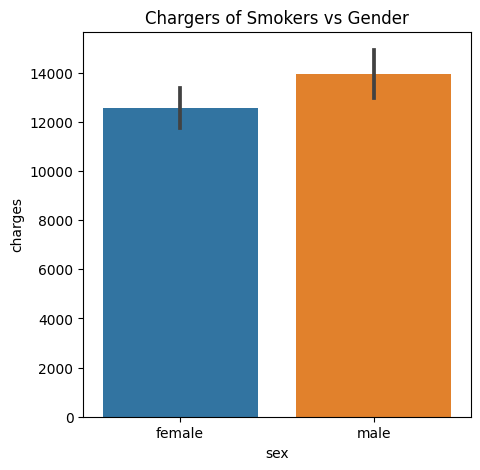

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges", data=df)
plt.title("Chargers of Smokers vs Gender")
plt.show

Male have higher charges than females

<function matplotlib.pyplot.show(close=None, block=None)>

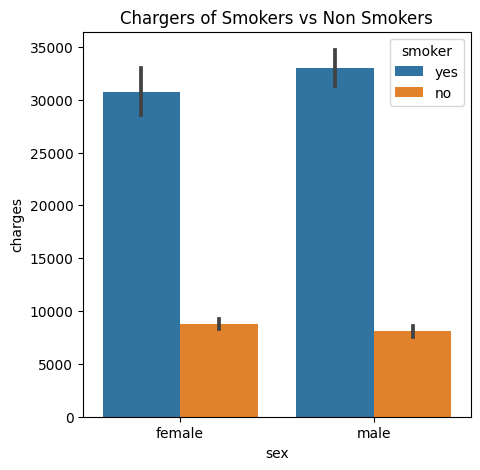

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges",hue="smoker", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

Male who are smokers have higer charges than the females who are smokers but males who are not smokers have lower chages than the female who are not smokers

<function matplotlib.pyplot.show(close=None, block=None)>

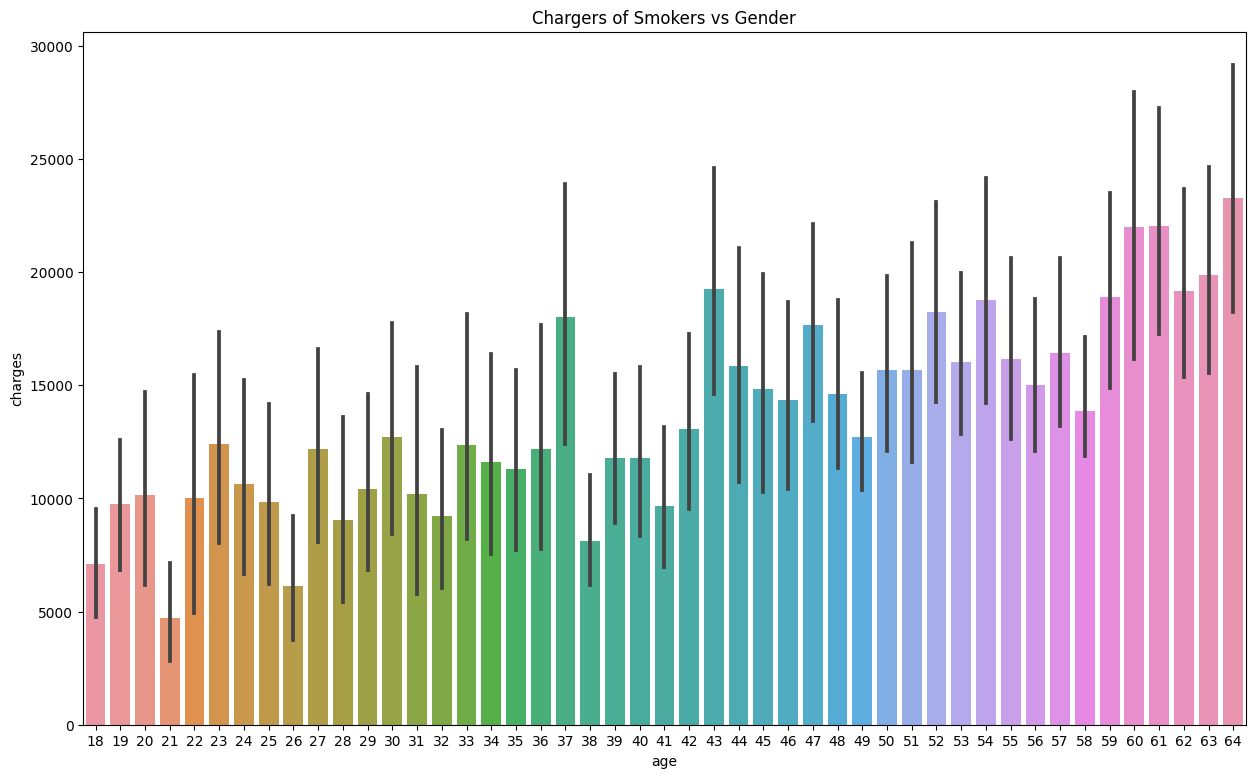

In [32]:
plt.figure(figsize=(15,9))
sns.barplot(x="age",y="charges", data=df)
plt.title("Chargers of Smokers vs Gender")
plt.show

As the age is increasing the charges is also increasing

# Visualizing Numerical data

In [33]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


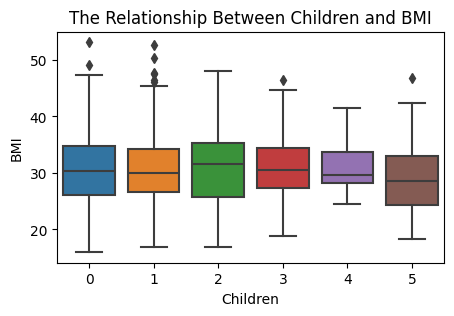

In [34]:
plt.figure(figsize=(5,3))
sns.boxplot(x="children", y="bmi", data=df)
plt.title("The Relationship Between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

children who are 2 years old have more bmi than others

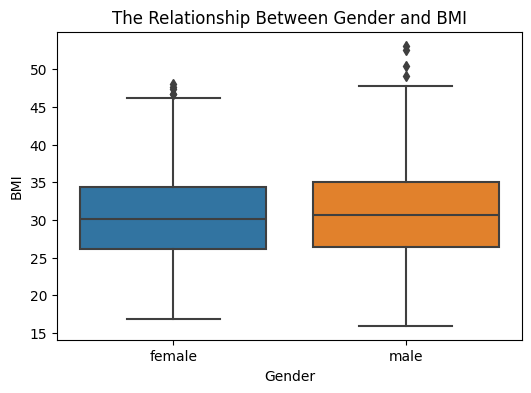

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("The Relationship Between Gender and BMI")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

Gender male have more bmi

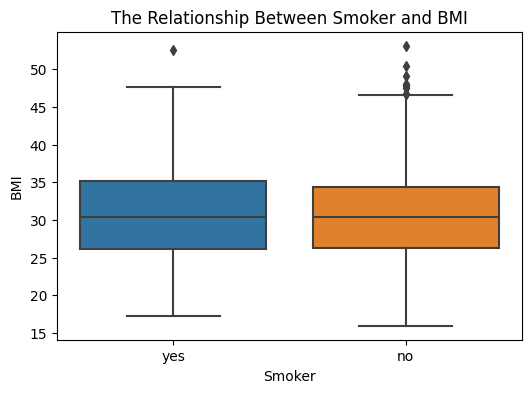

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="bmi", data=df)
plt.title("The Relationship Between Smoker and BMI")
plt.xlabel("Smoker")
plt.ylabel("BMI")
plt.show()

Smokers have more bmi

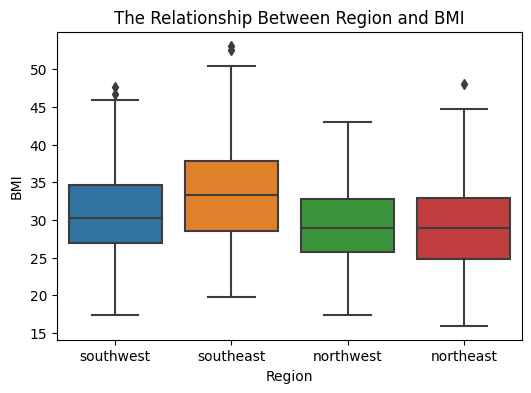

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="bmi", data=df)
plt.title("The Relationship Between Region and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

Southeast people have more bmi

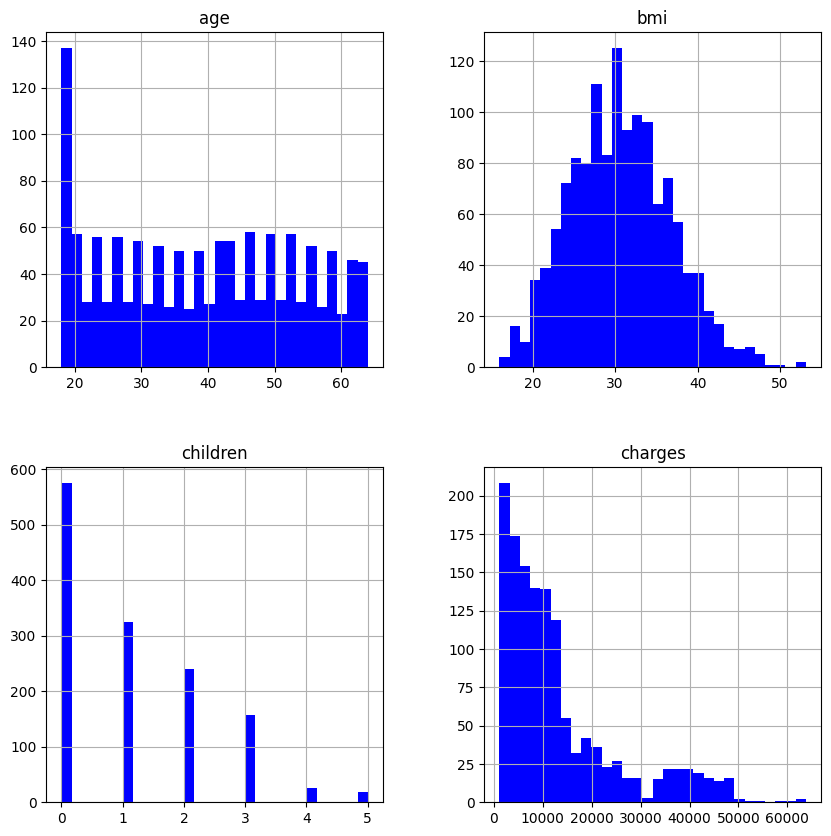

In [41]:
df[numerical_columns].hist(bins=30, figsize=(10,10),color="blue")
plt.show()

1) In age columns there is more number of peoples are in age group of betweeen 10 and 20.

2) In bmi there is more people in age group of 25 to 35.

3) In children column there are more number of people who dont't have any childre and tere are fev people have have more than 4-5 childrens.

4) In charges columns there are more people whose charges is 10000 and very fev have more than 50000 to 60000

# Checking outliers

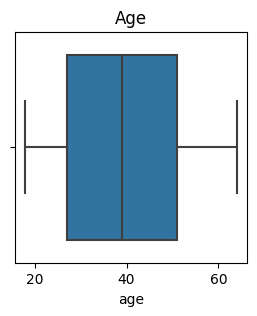

In [42]:
plt.figure(figsize=(3,3))
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

there is no outliers

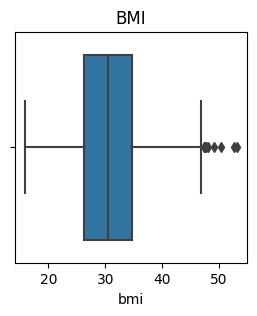

In [43]:
plt.figure(figsize=(3,3))
sns.boxplot(df['bmi'])
plt.title("BMI")
plt.show()

There are some outliers in bmi column

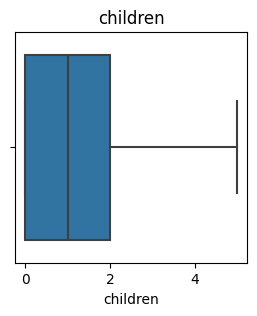

In [44]:
plt.figure(figsize=(3,3))
sns.boxplot(df['children'])
plt.title("children")
plt.show()

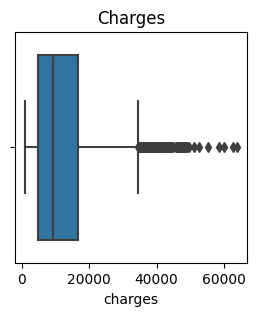

In [45]:
plt.figure(figsize=(3,3))
sns.boxplot(df['charges'])
plt.title("Charges")
plt.show()

<Axes: >

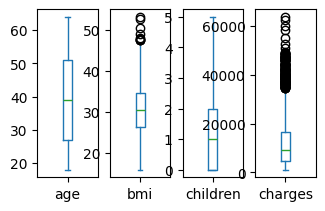

In [46]:
df.plot(kind='box',subplots=True,layout=(2,7))
sns.boxplot(notch=True, showcaps=False)

There are some outliers in bmi and charges columns

# Removing Outliers

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df[numerical_columns]))

In [49]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


In [55]:
new_df=df[(z<3).all(axis=1)]  #removing outliers

age            Axes(0.125,0.53;0.0945122x0.35)
bmi         Axes(0.238415,0.53;0.0945122x0.35)
children    Axes(0.351829,0.53;0.0945122x0.35)
charges     Axes(0.465244,0.53;0.0945122x0.35)
dtype: object

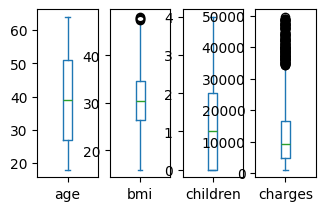

In [56]:
new_df.plot(kind='box',subplots=True,layout=(2,7))

In [57]:
new_df.shape

(1309, 7)

In [64]:
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns
skewness = new_df[numeric_columns].skew()

In [65]:
skewness

age         0.051340
bmi         0.191432
children    0.738119
charges     1.437160
dtype: float64

In [69]:
#Removing skewness using cuberoot method
skewness["children"]=np.cbrt(skewness["children"])

In [70]:
skewness["bmi"]=np.cbrt(skewness["bmi"])

In [76]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewnessq = df[numeric_columns].skew()

In [80]:
skewnessq

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Convert catogerical values in numerical values

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encode using Label encoder beause it has more than 2 catogerical values in region column

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le=LabelEncoder()
new_df['sex']=le.fit_transform(new_df['sex'])
new_df['smoker']=le.fit_transform(new_df['smoker'])
new_df['region']=le.fit_transform(new_df['region'])

list1=['sex','smoker','region']       #this can be use if there is any float or int value is present 
for val in list1:
    new_df[val]=le.fit_transform(new_df[val].astype(str))
    
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,16884.92400
1,18,1,33.770,1.00000,0,2,1725.55230
2,28,1,33.000,1.44225,0,2,4449.46200
3,33,1,22.705,0.00000,0,1,21984.47061
4,32,1,28.880,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0,1,10600.54830
1334,18,0,31.920,0.00000,0,0,2205.98080
1335,18,0,36.850,0.00000,0,2,1629.83350
1336,21,0,25.800,0.00000,0,3,2007.94500


In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   int32  
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   float64
 4   smoker    1309 non-null   int32  
 5   region    1309 non-null   int32  
 6   charges   1309 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 66.5 KB


In [85]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,16884.92400
1,18,1,33.770,1.00000,0,2,1725.55230
2,28,1,33.000,1.44225,0,2,4449.46200
3,33,1,22.705,0.00000,0,1,21984.47061
4,32,1,28.880,0.00000,0,1,3866.85520


In [86]:
new_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059031,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042498,0.014302,0.079058,0.003084,0.059455
bmi,0.118178,0.042498,1.000000,0.026375,-0.005288,0.160126,0.191453
children,0.059031,0.014302,0.026375,1.000000,0.022694,0.005582,0.091228
smoker,-0.029090,0.079058,-0.005288,0.022694,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.160126,0.005582,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.191453,0.091228,0.785129,-0.007633,1.000000


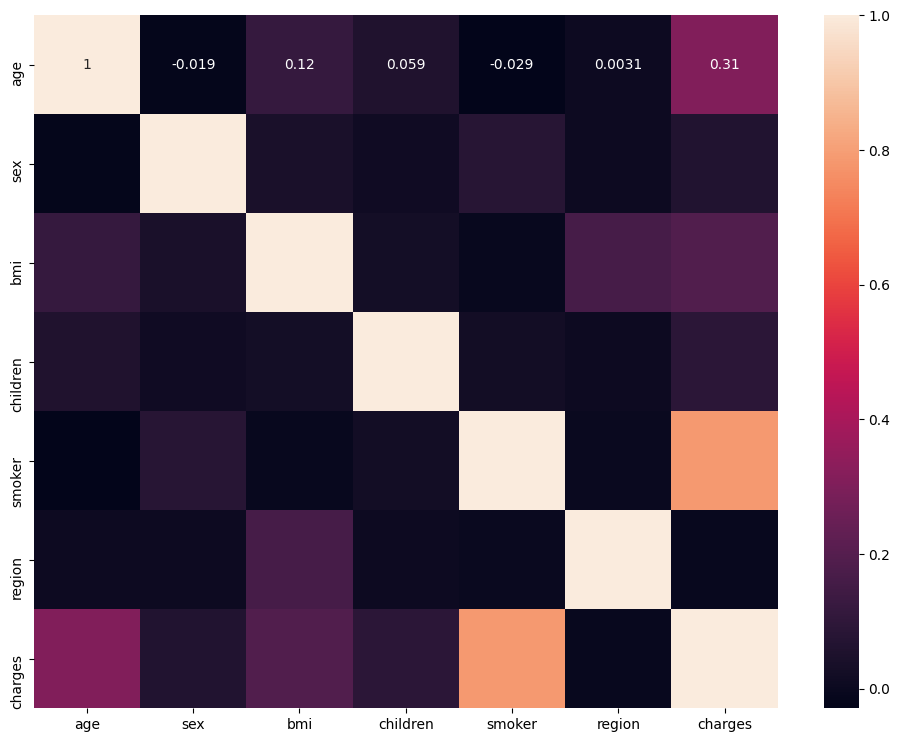

In [88]:
plt.figure(figsize=(12,9))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

smoker have higher corelation to the target variable that is charges and sex have very low corelation

# Spliting the data into x and y

In [90]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [91]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (916, 6)
y_train shape: (916,)
x_test shape: (393, 6)
y_test.shape: (393,)


# Linear regression

In [92]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
print(LR.score(x_train,y_train)*100," %")
print(r2_score(y_test,pred_LR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

74.32846036614411  %
77.22031116396853  %
Mean absolute error: 4127.228307689075
Mean squared error: 33084381.05712281
Root mean squared error: 5751.902385917447


# KNeighborsRegressor

In [93]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
print('R2_score',r2_score(y_test,pred_KNN)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_KNN))
print('Mean squared error:',mean_squared_error(y_test,pred_KNN))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score 19.39133875795589  %
Mean absolute error: 7565.782047569975
Mean squared error: 117073050.65633732
Root mean squared error: 10820.03006725662


# Ridge Regression

In [94]:
RR = Ridge(alpha=10)
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)

print('R2_score',r2_score(y_test,pred_RR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RR))
print('Mean squared error:',mean_squared_error(y_test,pred_RR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RR)))

R2_score 76.75695043946466  %
Mean absolute error: 4253.317164778826
Mean squared error: 33757349.107157916
Root mean squared error: 5810.107495318646


# Lasso Regression

In [95]:
L = Lasso(alpha=0.001)
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

R2_score 77.22030956844723  %
Mean absolute error: 4127.228783130924
Mean squared error: 33084383.37439919
Root mean squared error: 5751.902587353092


# Decision Tree Regression

In [96]:
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
print('R2_score',r2_score(y_test,pred_DTR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean squared error:',mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 86.441829877576  %
Mean absolute error: 2665.1795555860704
Mean squared error: 19691386.919125233
Root mean squared error: 4437.497821872731


# Support vector Regression

In [97]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SVR = SV.predict(x_test)
print('R2_score',r2_score(y_test,pred_SVR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_SVR))
print('Mean squared error:',mean_squared_error(y_test,pred_SVR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score -12.25588296478437  %
Mean absolute error: 8451.999768745165
Mean squared error: 163036309.87427142
Root mean squared error: 12768.567260044152


# RandomForestRegressor

In [98]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
print('R2_score',r2_score(y_test,pred_RFR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean squared error:',mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 86.7929994235173  %
Mean absolute error: 2412.8047864450373
Mean squared error: 19181361.204673763
Root mean squared error: 4379.653091818319


# Gradient Boosting Regressor

In [99]:
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
print('R2_score',r2_score(y_test,pred_GBR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean squared error:',mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 88.07152250916695  %
Mean absolute error: 2271.725231165885
Mean squared error: 17324481.364899337
Root mean squared error: 4162.268776148332


# Gradient Boosting Regressor gives max Accuracy

In [100]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(GBR,x,y)
print("Cross-validation scores:", score)
print("Mean Cross-validation score:", np.mean(score))
print("Difference between R2 score and cross-validation:", (r2_score(y_test, pred_GBR) -score.mean() * 100))

Cross-validation scores: [0.8780829  0.8053917  0.8839137  0.84549368 0.8638734 ]
Mean Cross-validation score: 0.8553510788885716
Difference between R2 score and cross-validation: -84.6543926637655


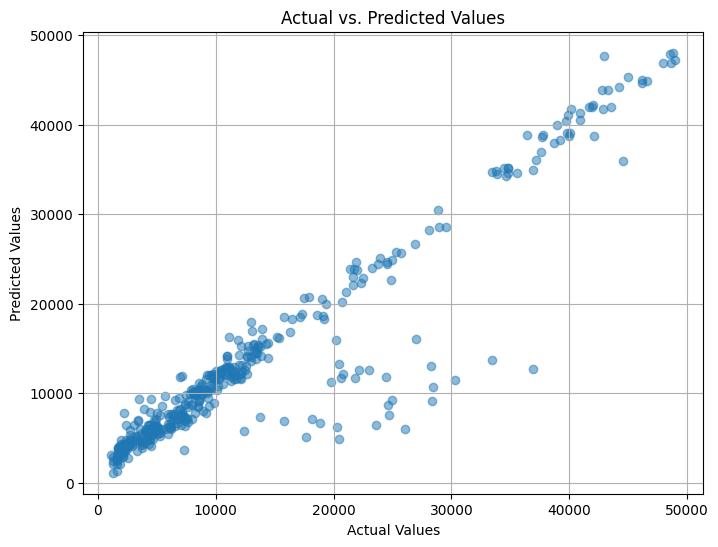

In [101]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_GBR, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Saving The best model

In [102]:
import joblib
# Save the model as a objectfile

joblib.dump(GBR,'Medical_Cost_Personal_Insurance') 

['Medical_Cost_Personal_Insurance']

In [104]:
Medical_Cost_Personal_Insurance=joblib.load(open("Medical_Cost_Personal_Insurance","rb"))

In [105]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,16884.92400
1,18,1,33.770,1.00000,0,2,1725.55230
2,28,1,33.000,1.44225,0,2,4449.46200
3,33,1,22.705,0.00000,0,1,21984.47061
4,32,1,28.880,0.00000,0,1,3866.85520


In [106]:
test = (19,0,3.032970,0.00000,1,3) #taking data from 1st row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = Medical_Cost_Personal_Insurance.predict(reshape)
print(pred)

[14259.08167422]


# THE END